In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

c:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



4422102/4422102 [==============================] - 1s 0us/step


In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

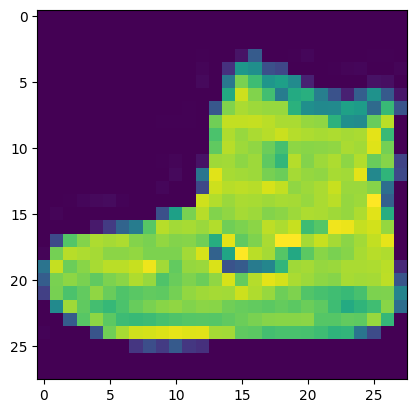

In [4]:
# plot a single sample

import matplotlib.pyplot as plt
import pandas as pd

plt.imshow(train_data[0])

In [5]:
# create a small list so we can index on out training labels so we can made them human readable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Coat')

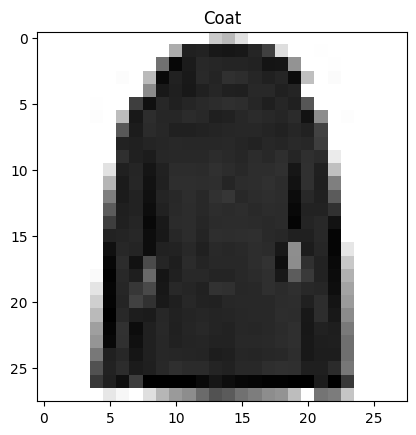

In [6]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

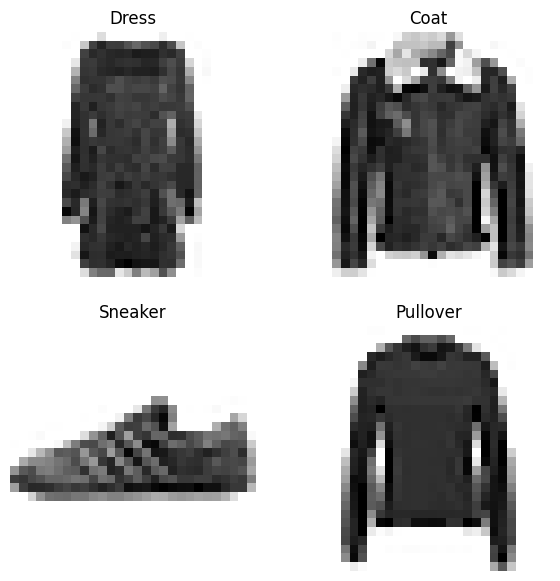

In [7]:
# plot multiple random images

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_idx], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_idx]])
  plt.axis(False)

In [8]:
# building a multiclass clasification model


# diff output activation function - softmax
# diff loss - categoricalcrossentropy
# input shape - we have to give a shape which in this case is 28 x 28
# out shape - output shape is always equal to amount of classes that we have as in our case we have 10 classes so 10 will be the shape


In [9]:
# our data needs to be flatten from 28 * 28 to (None, 784)

In [10]:
tf.random.set_seed(42)


model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


his_11 = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 2.2863 - accuracy: 0.1156 - val_loss: 2.1059 - val_accuracy: 0.1978
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9340 - accuracy: 0.1995 - val_loss: 1.8160 - val_accuracy: 0.2002
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7848 - accuracy: 0.2002 - val_loss: 1.7539 - val_accuracy: 0.1979
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7477 - accuracy: 0.1985 - val_loss: 1.7273 - val_accuracy: 0.2089
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7353 - accuracy: 0.2001 - val_loss: 1.7197 - val_accuracy: 0.2056
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7266 - accuracy: 0.2050 - val_loss: 1.7000 - val_accuracy: 0.2174
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7091 - accuracy: 0.2141 - val_loss: 1.6843 - val_accu

In [11]:
# ValueError: Shapes (32, 1) and (32, 10) are incompatible
# because the integer values in our train_labels are not one hot encoded and we are using categorical cross_entropy to solve this we should use sparse
# to make categorical work you need to do it tf.one_hot(train_labels, depth=10)

In [12]:
# check the model summary

model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# as we know that neural networks works best when we have scaled data now we will try to normalize or you can say scale our data between 1 and 0


train_data.max(), train_data.min()

(255, 0)

In [14]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [15]:
train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [16]:
# building model to find patterns in normalized data now

In [17]:
tf.random.set_seed(42)


model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


his_12 = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels), verbose=0)

<Axes: title={'center': 'normalized data'}>

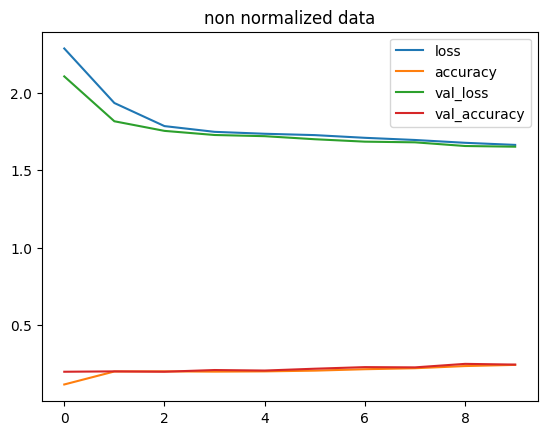

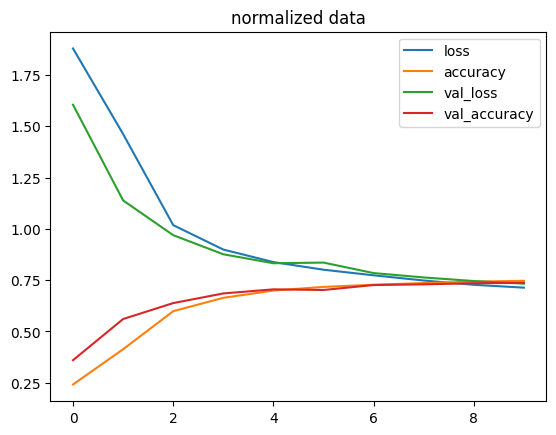

In [18]:
pd.DataFrame(his_11.history).plot(title='non normalized data')
pd.DataFrame(his_12.history).plot(title='normalized data')

In [19]:
# always bring change a little by little do not change multiple things at a time change one thing and see how it effects your model than keep on improving/changing

In [20]:
# finding the ideal learning rate to see if it changes anything


tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

his_13 = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3289 - accuracy: 0.5265 - val_loss: 1.0380 - val_accuracy: 0.6280 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8953 - accuracy: 0.6701 - val_loss: 0.8537 - val_accuracy: 0.6749 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7846 - accuracy: 0.7034 - val_loss: 0.8167 - val_accuracy: 0.7094 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6991 - accuracy: 0.7578 - val_loss: 0.6974 - val_accuracy: 0.7754 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6164 - accuracy: 0.7926 - val_loss: 0.6614 - val_accuracy: 0.7731 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5853 - accuracy: 0.8013 - val_loss: 0.6257 - val_accuracy: 0.7915 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] 

Text(0.5, 1.0, 'Finding the ideal Learning rate')

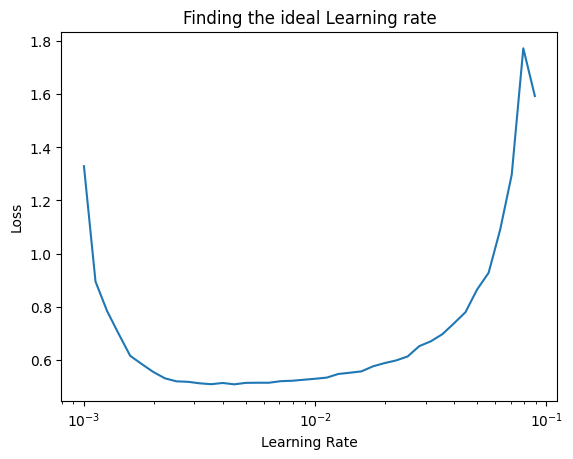

In [21]:
import numpy as np


lrs = 1e-3 * (10 **(tf.range(40)/20))
plt.semilogx(lrs, his_13.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal Learning rate')


In [22]:
# the ideal learning rate is 0.001
# fitting our model again with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

his_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 1.2984 - accuracy: 0.4650 - val_loss: 1.0328 - val_accuracy: 0.6057
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9451 - accuracy: 0.6272 - val_loss: 0.9061 - val_accuracy: 0.6603
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8329 - accuracy: 0.6834 - val_loss: 0.8265 - val_accuracy: 0.6920
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7717 - accuracy: 0.7143 - val_loss: 0.7753 - val_accuracy: 0.7080
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7288 - accuracy: 0.7322 - val_loss: 0.7095 - val_accuracy: 0.7385
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6521 - accuracy: 0.7599 - val_loss: 0.6798 - val_accuracy: 0.7569
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6254 - accuracy: 0.7713 - val_loss: 0.6444 - val_accurac

In [23]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") /cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  classes = False
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else "black",
            size=text_size)



In [24]:
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 2s 2ms/step


array([[5.17305887e-09, 6.89193912e-05, 7.86525163e-07, 7.86578624e-08,
        2.36483652e-06, 3.35059375e-01, 3.43075901e-09, 9.72702205e-02,
        5.20671861e-08, 5.67598224e-01],
       [1.34865043e-03, 1.14110180e-05, 9.24648404e-01, 3.86406924e-07,
        2.49104891e-02, 6.46725647e-14, 4.90806252e-02, 1.63953434e-15,
        3.03485501e-11, 1.82828887e-20],
       [4.23244683e-06, 9.99921799e-01, 1.18349244e-05, 1.75256282e-05,
        1.69519119e-08, 4.45473452e-05, 1.19217463e-08, 1.66792379e-30,
        1.19613710e-13, 9.48912650e-12],
       [1.32901948e-06, 9.99134123e-01, 1.15841175e-07, 1.20114557e-04,
        3.73899023e-10, 7.44390709e-04, 6.53713472e-10, 5.16235449e-35,
        1.02228339e-12, 2.07747916e-11],
       [2.83168286e-01, 1.55570440e-03, 8.27040076e-02, 1.92622580e-02,
        1.45926038e-02, 2.42122294e-10, 5.98713934e-01, 1.90349281e-23,
        3.16061846e-06, 1.09373672e-19]], dtype=float32)

In [25]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

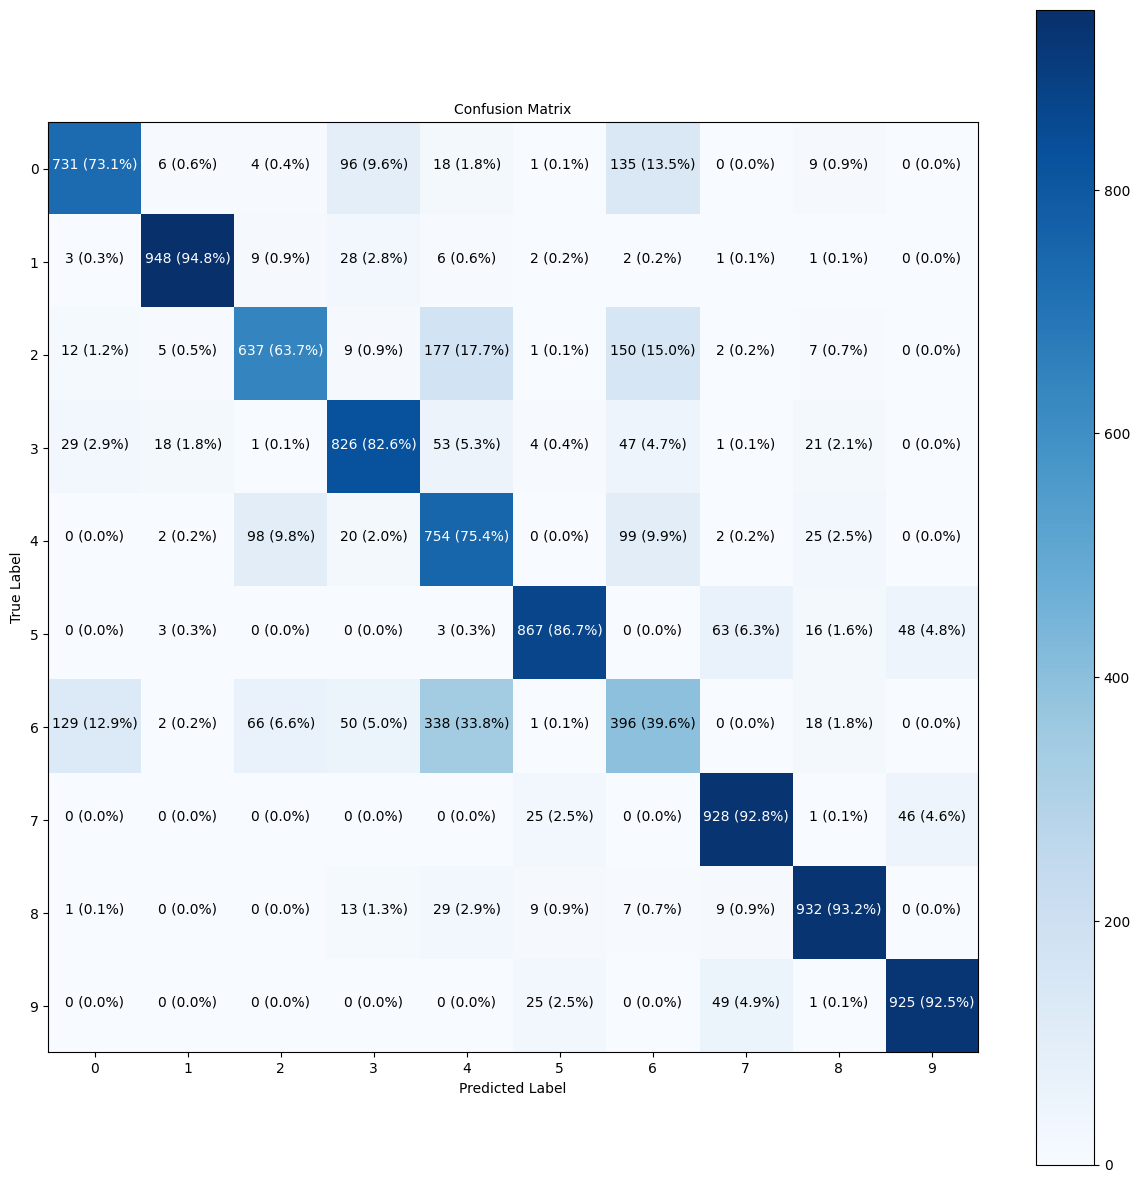

In [26]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)